In [92]:
#pip install pandas

from pandas import Series

In [93]:
fruit = Series([2500,3800,1200,6000], index=['apple','banana','peer','cherry'])

In [94]:
fruit   #일반 파이썬에서는 출력이 안되고 주피터노트북에서만 가능
#'1'    #한 셀에서 이 기능으로 출력은 한개만 가능/ 두가지 이상 출력시 프린트구문사용

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64

In [95]:
# 값과 인덱스를 추출
print(fruit.values)
print(fruit.index)

[2500 3800 1200 6000]
Index(['apple', 'banana', 'peer', 'cherry'], dtype='object')


In [96]:
#Dict 타입{키:값}으로 표현
fruitData = {'apple':2500, 'banana':3800,'peer':1200,'cherry':6000}
fruit = Series(fruitData)

In [97]:
print(type(fruitData))
print(type(fruit))

<class 'dict'>
<class 'pandas.core.series.Series'>


In [98]:
fruit

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64

In [99]:
# Series 객체의 이름과 컬럼명 설정
fruit.name = 'fruitPrice'
fruit.index.name = 'fruitName'

In [100]:
fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64

Series가 모여서 Dataframe 형성

In [101]:
# DataFrame

fruitData = {'fruitName':['apple','banana','peer','cherry'],
             'fruitPrice':[2500,3800,1200,6000],
             'num':[10,5,3,8]
             }          # 아직 Dict형식으로 3개의 리스트

In [102]:
from pandas import DataFrame
fruitFrame = DataFrame(fruitData)

In [103]:
fruitFrame

,fruitName,fruitPrice,num
0,apple,2500,10
1,banana,3800,5
2,peer,1200,3
3,cherry,6000,8


In [104]:
# 컬럼 순서 지정하기

fruitFrame = DataFrame(fruitData, columns=['fruitPrice','num','fruitName'])
fruitFrame

,fruitPrice,num,fruitName
0,2500,10,apple
1,3800,5,banana
2,1200,3,peer
3,6000,8,cherry


In [105]:
# 특정 항목 추출하기

fruitFrame['fruitName']   # 데이터 구조적인 관점으로 추출

0     apple
1    banana
2      peer
3    cherry
Name: fruitName, dtype: object

In [106]:
fruitFrame.fruitName   #객체지향적인 관점으로 추출

0     apple
1    banana
2      peer
3    cherry
Name: fruitName, dtype: object

In [107]:
# 컬럼 추가하기
fruitFrame['Year'] = '2022'

In [108]:
fruitFrame

,fruitPrice,num,fruitName,Year
0,2500,10,apple,2022
1,3800,5,banana,2022
2,1200,3,peer,2022
3,6000,8,cherry,2022


In [109]:
# Series 객체의 추가

variable = Series([4,2,1], index = [0,2,3]) #index를 지정하면 일대일대응이 아니어도됨

fruitFrame['Stock'] = variable

fruitFrame

,fruitPrice,num,fruitName,Year,Stock
0,2500,10,apple,2022,4.0
1,3800,5,banana,2022,NaN
2,1200,3,peer,2022,2.0
3,6000,8,cherry,2022,1.0


In [110]:
# <자료 구조 다뤄보기>
# 1.데이터 구조의 항목을 삭제

fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64

In [111]:
fruit.drop('banana')   # .drop 자체로는 삭제가 안되며 삭제된 객체를 리턴
fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64

In [112]:
newFruit = fruit.drop('banana')
newFruit

#fruit = fruit.drop('banana')

fruitName
apple     2500
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64

In [113]:
# 2.인덱스를 특정 키워드로 네이밍
fruitData

{'fruitName': ['apple', 'banana', 'peer', 'cherry'],
 'fruitPrice': [2500, 3800, 1200, 6000],
 'num': [10, 5, 3, 8]}

In [114]:
# 과일이름을 인덱스로 사용
fruitName = fruitData['fruitName']
fruitName

['apple', 'banana', 'peer', 'cherry']

In [115]:
fruitFrame = DataFrame(fruitData, index=fruitName, columns=['fruitPrice','num'])
fruitFrame

,fruitPrice,num
apple,2500,10
banana,3800,5
peer,1200,3
cherry,6000,8


In [116]:
newfruitFrame = fruitFrame.drop(['apple','cherry'])
newfruitFrame

,fruitPrice,num
banana,3800,5
peer,1200,3


In [117]:
newfruitFrame = fruitFrame.drop(['num'])
newfruitFrame

KeyError: ignored

에러의 원인: 축의 기준을 바꿔야함

In [118]:
newfruitFrame = fruitFrame.drop(['num'],axis=1)
newfruitFrame

,fruitPrice
apple,2500
banana,3800
peer,1200
cherry,6000


In [119]:
# Pandas Slice 사용하는 방법

fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64

In [120]:
fruit[:]

fruitName
apple     2500
banana    3800
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64

In [121]:
fruit['apple':'peer']   #기존과 다르게 해당 지점을 포함하여 자름

fruitName
apple     2500
banana    3800
peer      1200
Name: fruitPrice, dtype: int64

In [122]:
# Series 객체의 기본 연산
fruit1 = Series([5,9,10,3], index=['apple','banana','cherry','peer'])
fruit2 = Series([3,2,9,5,10], index=['apple','orange','banana','cherry','mango'])

In [123]:
newFruit = fruit1 + fruit2   #양쪽 시리즈에 모두있는 객체가 계산
newFruit                     #한쪽에 없다면 Null로 취급

apple      8.0
banana    18.0
cherry    15.0
mango      NaN
orange     NaN
peer       NaN
dtype: float64

In [124]:
# DataFrame 객체의 기본 연산
fruitData1 = {'Ohio':[4,8,3,5],'Texas':[0,1,2,3]}
fruitData2 = {'Ohio':[3,0,2,1,7],'Colorado':[5,4,3,6,0]}
fruitFrame1 = DataFrame(fruitData1, columns=['Ohio','Texas'], 
                        index=['apple','banana','cherry','peer'])
fruitFrame2 = DataFrame(fruitData2, columns=['Ohio','Colorado'], 
                        index=['apple','orange','banana','cherry','mango'])

In [125]:
fruitFrame1

,Ohio,Texas
apple,4,0
banana,8,1
cherry,3,2
peer,5,3


In [126]:
fruitFrame2

,Ohio,Colorado
apple,3,5
orange,0,4
banana,2,3
cherry,1,6
mango,7,0


In [127]:
newfruitFrame = fruitFrame1 + fruitFrame2
newfruitFrame

,Colorado,Ohio,Texas
apple,NaN,7.0,NaN
banana,NaN,10.0,NaN
cherry,NaN,4.0,NaN
mango,NaN,NaN,NaN
orange,NaN,NaN,NaN
peer,NaN,NaN,NaN


In [128]:
# 데이터의 정렬

# Series의 정렬
fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64

In [129]:
fruit.sort_values()  #fruit.sort_values(ascending=True)

fruitName
peer      1200
apple     2500
banana    3800
cherry    6000
Name: fruitPrice, dtype: int64

In [130]:
fruit.sort_values(ascending=False)

fruitName
cherry    6000
banana    3800
apple     2500
peer      1200
Name: fruitPrice, dtype: int64

In [131]:
fruitName = fruitData['fruitName']

In [132]:
fruitFrame = DataFrame(fruitData, index=fruitName, columns=['num','fruitPrice'])
fruitFrame

,num,fruitPrice
apple,10,2500
banana,5,3800
peer,3,1200
cherry,8,6000


In [133]:
# index 역순정렬
fruitFrame.sort_index(ascending=False)

,num,fruitPrice
peer,3,1200
cherry,8,6000
banana,5,3800
apple,10,2500


In [134]:
fruitFrame.sort_index(axis=1)

,fruitPrice,num
apple,2500,10
banana,3800,5
peer,1200,3
cherry,6000,8


In [135]:
fruitFrame.sort_values(by=['fruitPrice','num'])

,num,fruitPrice
peer,3,1200
apple,10,2500
banana,5,3800
cherry,8,6000


In [136]:
# Pandas 이용 기초분석

import pandas as pd

In [137]:
#read_csv 메소드를 사용하여 csv파일을 바로 불러들임
german = pd.read_csv('http://freakonometrics.free.fr/german_credit.csv')  

In [138]:
type(german)

pandas.core.frame.DataFrame

In [139]:
german.columns.values

array(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'], dtype=object)

In [140]:
german_sample = german[['Creditability','Duration of Credit (month)','Purpose','Credit Amount']]

In [141]:
german_sample

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171
...,...,...,...,...
995,0,24,3,1987
996,0,24,0,2303
997,0,21,0,12680
998,0,12,3,6468


In [142]:
german_sample.min()

Creditability                   0
Duration of Credit (month)      4
Purpose                         0
Credit Amount                 250
dtype: int64

In [143]:
german_sample.max()

Creditability                     1
Duration of Credit (month)       72
Purpose                          10
Credit Amount                 18424
dtype: int64

In [144]:
german_sample.mean()

Creditability                    0.700
Duration of Credit (month)      20.903
Purpose                          2.828
Credit Amount                 3271.248
dtype: float64

In [145]:
german_sample.head() # .head 맛보기 5개

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171


In [146]:
german_sample.corr() #상관관계 분석

,Creditability,Duration of Credit (month),Purpose,Credit Amount
Creditability,1.000000,-0.214927,-0.017979,-0.154740
Duration of Credit (month),-0.214927,1.000000,0.147492,0.624988
Purpose,-0.017979,0.147492,1.000000,0.068480
Credit Amount,-0.154740,0.624988,0.068480,1.000000


In [149]:
# Group By 를 이용한 계산 및 요약 통계

german_sample = german[['Credit Amount','Type of apartment']]
german_sample

,Credit Amount,Type of apartment
0,1049,1
1,2799,1
2,841,1
3,2122,1
4,2171,2
...,...,...
995,1987,1
996,2303,2
997,12680,3
998,6468,2


In [150]:
# 주거형태에 따른 소비량 집계
german_grouped = german_sample['Credit Amount'].groupby(german_sample['Type of apartment'])

In [151]:
german_grouped.mean()

Type of apartment
1    3122.553073
2    3067.257703
3    4881.205607
Name: Credit Amount, dtype: float64

In [152]:
german_grouped.max()

Type of apartment
1    15945
2    18424
3    14782
Name: Credit Amount, dtype: int64

In [154]:
german_sample = german[['Type of apartment','Sex & Marital Status','Credit Amount']]

In [155]:
german_sample.groupby('Type of apartment')

In [158]:
for type, group in german_sample.groupby('Type of apartment'):
  print(type)
  print(group.head())

1
   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
1                  1                     3           2799
2                  1                     2            841
3                  1                     3           2122
5                  1                     3           2241
2
    Type of apartment  Sex & Marital Status  Credit Amount
4                   2                     3           2171
6                   2                     3           3398
7                   2                     3           1361
8                   2                     2           1098
12                  2                     2           1957
3
     Type of apartment  Sex & Marital Status  Credit Amount
29                   3                     3           4796
44                   3                     3           1239
69                   3                     3           2032
125                  3                     4        

In [159]:
for type, sex, group in german_sample.groupby(['Type of apartment','Sex & Marital Status']):
  print(type, sex)

ValueError: ignored

넘어오는 값은 2갠데 3개를 지정했다
 따라서 (type, sex)를 튜플하나로 받아야함

In [162]:
for (type, sex), group in german_sample.groupby(['Type of apartment','Sex & Marital Status']):
  print(type, sex)
  print(group.head(n=3))

1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4


In [163]:
# 행성 데이터 가져오기
import seaborn as sns
planets = sns.load_dataset('planets')

In [164]:
planets.shape # 2차원의 배열이며 1035개 자료, 6개 분류

(1035, 6)

In [165]:
planets.head(n=5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [168]:
planets


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [169]:
planets.dropna()  # 위에 Null값이 속한 행 지우기

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


<Null 값처리 방법>
1. Drop - Null 줄 제거
2. 임의의 숫자로 치환 - 오차발생가능
3. 평균값으로 치환

In [173]:
# 미국 출생 인구통계 
pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [174]:
# 데이터 프레임에 저장
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [175]:
births.shape

(15547, 5)

In [178]:
births.head

<bound method NDFrame.head of        year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]>

In [183]:
# 10년 단위로 가공하기

births['year'] // 10 *10       #10으로 나누고 소숫점 버린뒤 10곱하기

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15542    2000
15543    2000
15544    2000
15545    2000
15546    2000
Name: year, Length: 15547, dtype: int64

In [184]:
births['decade'] = births['year'] // 10 *10

In [185]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [187]:
# decade를 축으로 정리하기/// aggfunc='' 집계하는 함수
births.pivot_table('births',index = 'decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [189]:
import matplotlib.pyplot as plt  #시각화 패키지

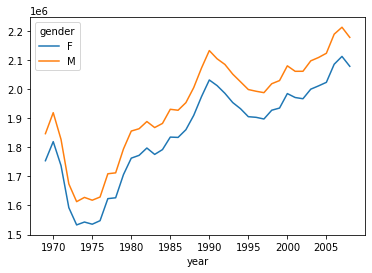

In [192]:
births.pivot_table('births', index ='year', columns='gender',aggfunc='sum').plot()